# IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# READING THE CSV FILE AND CONVERTING IT FOR ANALYSIS

In [ ]:
df = pd.read_csv("raw_sales.csv",index_col="datesold",parse_dates=True)

In [ ]:
df.head()

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29580 entries, 2007-02-07 to 2019-07-26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   postcode      29580 non-null  int64 
 1   price         29580 non-null  int64 
 2   propertyType  29580 non-null  object
 3   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


# ANALYSING DATA

In [ ]:
len(df['postcode'].unique())

27

In [ ]:
df['propertyType'].unique()

array(['house', 'unit'], dtype=object)

# PROPERTY TYPE

In [ ]:
housetype = [len(df[df['propertyType']=='house']),len(df[df['propertyType']=='unit'])]

In [ ]:
housetype

[24552, 5028]

In [ ]:
df['propertyType']

datesold
2007-02-07    house
2007-02-27    house
2007-03-07    house
2007-03-09    house
2007-03-21    house
              ...  
2019-07-25     unit
2019-07-25     unit
2019-07-26     unit
2019-07-26     unit
2019-07-26     unit
Name: propertyType, Length: 29580, dtype: object

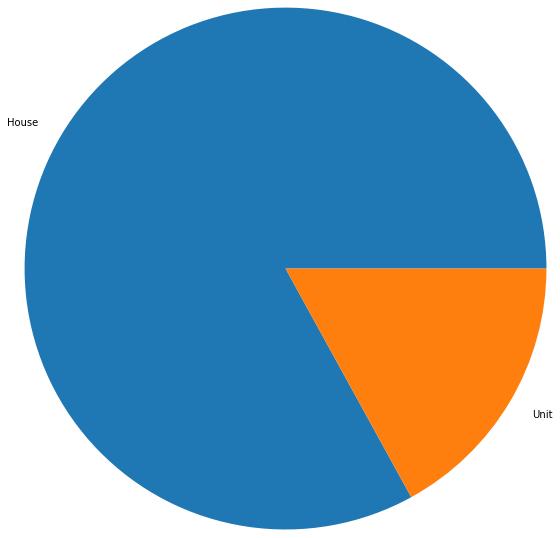

In [ ]:
plt.pie(housetype,labels = ['House','Unit'],radius=3);

MOST 

# DIFFERENT POSTAL CODES

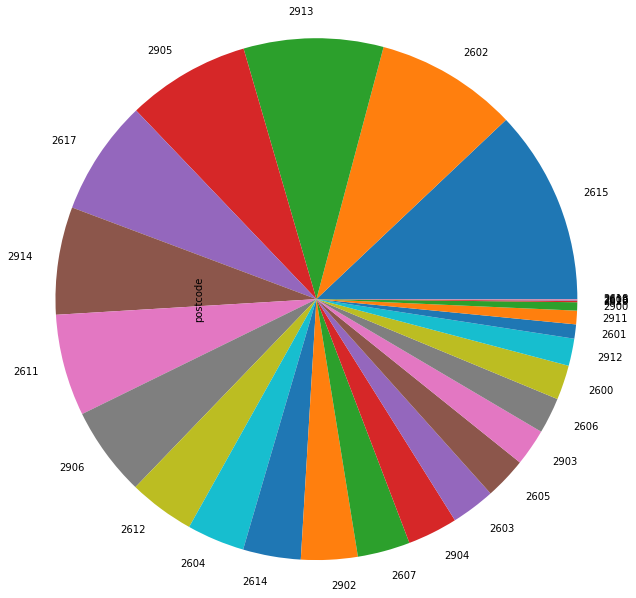

In [ ]:
df['postcode'].value_counts().plot(kind='pie',radius=3)

# DIFFERENT BEDROOM NO

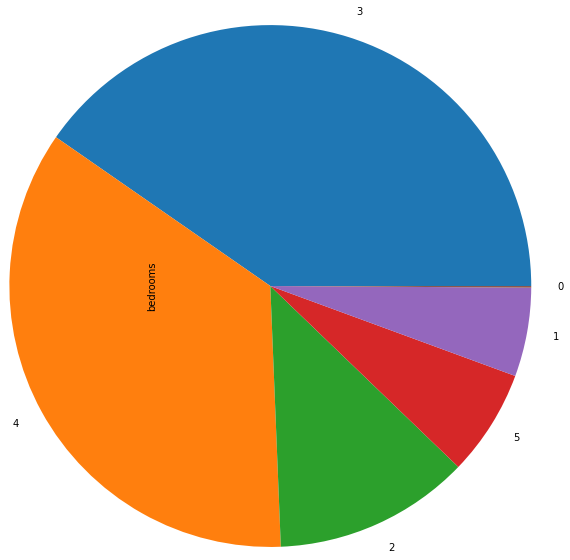

In [ ]:
df['bedrooms'].value_counts().plot(kind='pie',radius=3)

In [ ]:
df.groupby(by=df['postcode']).mean()


,price,bedrooms
postcode,,
2600,1.028204e+06,3.007886
2601,5.404449e+05,1.619231
2602,6.957188e+05,2.982712
2603,1.028642e+06,3.013665
2604,6.476409e+05,2.461248
2605,7.861751e+05,3.391699
2606,5.698613e+05,2.629742
2607,6.947164e+05,3.448598
2609,1.447000e+05,1.800000


In [ ]:
df.groupby(by=df['postcode']).std()

,price,bedrooms
postcode,,
2600,532341.574941,1.134662
2601,200038.017229,0.672986
2602,283603.446827,0.962443
2603,704095.642364,1.204701
2604,289524.537468,0.873726
2605,278039.029471,0.883990
2606,331599.187967,1.125591
2607,253509.747179,0.969496
2609,50662.938459,0.632456


# VERY HIGH STD IN PROPERTY PRICES FOR A GIVEN POSTAL CODE WITH MEAN OF MOST POSTAL CODES AROUND 5 X 10^5 (WE MAY DROP IT)

In [ ]:
df

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3
...,...,...,...,...
2019-07-25,2900,500000,unit,3
2019-07-25,2612,560000,unit,2
2019-07-26,2912,464950,unit,2


In [ ]:
df.drop(['postcode'],axis=1,inplace=True)

In [ ]:
df

,price,propertyType,bedrooms
datesold,,,
2007-02-07,525000,house,4
2007-02-27,290000,house,3
2007-03-07,328000,house,3
2007-03-09,380000,house,4
2007-03-21,310000,house,3
...,...,...,...
2019-07-25,500000,unit,3
2019-07-25,560000,unit,2
2019-07-26,464950,unit,2


MOST OF THE PROPERTIES ARE 3/4 BEDROOM

# ANALYSING CORRELATIONS 

## PRICE VS BEDROOMS

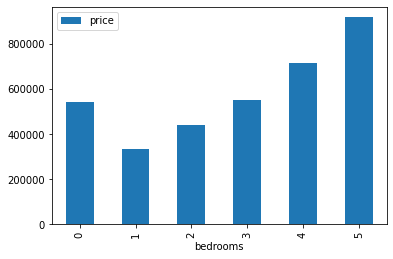

In [ ]:
df.groupby(by=df['bedrooms']).mean().plot(kind='bar')

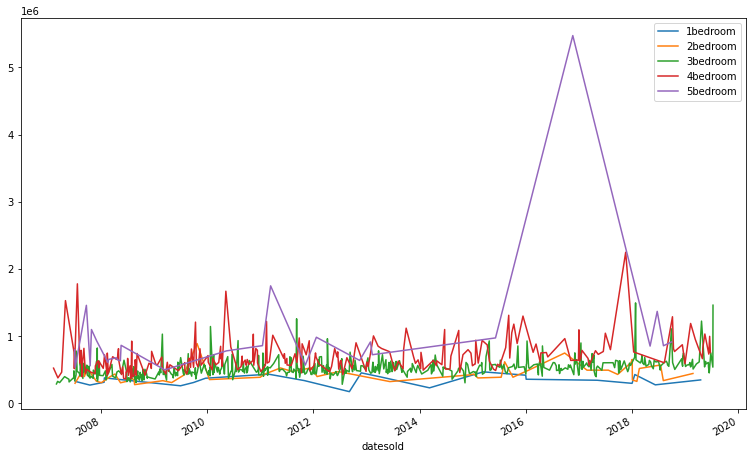

In [ ]:
ax= df[df['bedrooms']==1]['price'].plot(figsize=(13,8))
df[df['bedrooms']==2]['price'].plot(figsize=(13,8),ax=ax)
df[df['bedrooms']==3]['price'].plot(figsize=(13,8),ax=ax)
df[df['bedrooms']==4]['price'].plot(figsize=(13,8),ax=ax)
df[df['bedrooms']==5]['price'].plot(figsize=(13,8),ax=ax)
ax.legend(['1bedroom','2bedroom','3bedroom','4bedroom','5bedroom'])


In [ ]:
df['price'].corr(df['bedrooms'])

0.48421174303285086

GENERALLLY MORE NO OF BEDROOMS => MORE PRICE

# PRICE VS HOUSE TYPE

## ENCODING HOUSE (LABEL ENCODING)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df['propertyType']=le.fit_transform(df['propertyType'])

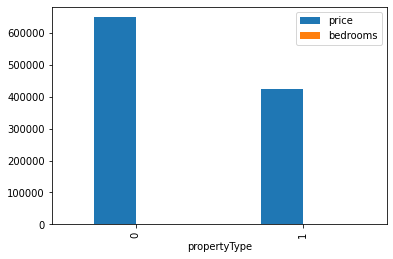

In [ ]:
df.groupby(by=df['propertyType']).mean().plot(kind='bar')

In [ ]:
df['price'].corr(df['propertyType'])

-0.29980803839246634

NORMAL HOUSES ARE MORE COSTLY ON AN AVERAGE

# TIME SERIES ANALYSIS

In [ ]:
df.head()

,price,propertyType,bedrooms
datesold,,,
2007-02-07,525000,0,4
2007-02-27,290000,0,3
2007-03-07,328000,0,3
2007-03-09,380000,0,4
2007-03-21,310000,0,3


In [ ]:
df.tail()

,price,propertyType,bedrooms
datesold,,,
2019-07-25,500000,1,3
2019-07-25,560000,1,2
2019-07-26,464950,1,2
2019-07-26,589000,1,2
2019-07-26,775000,1,2


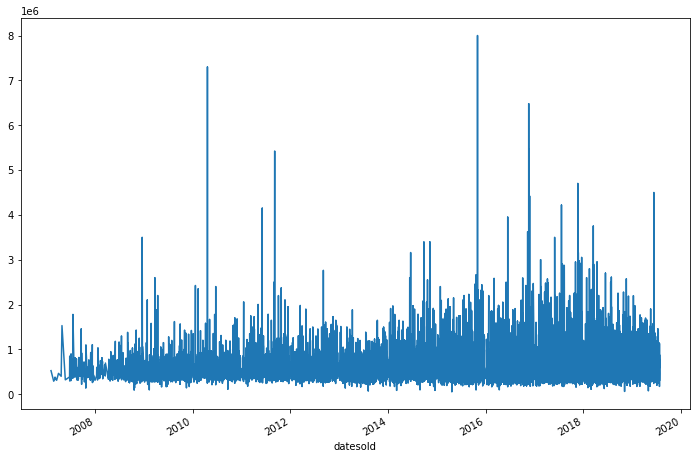

In [ ]:
df['price'].plot(figsize=(12,8));

# RESAMPLING DATA BY DAY

In [ ]:
df=df.resample('D').mean()

In [ ]:
df.head(10)

,price,propertyType,bedrooms
datesold,,,
2007-02-07,525000.0,0.0,4.0
2007-02-08,NaN,NaN,NaN
2007-02-09,NaN,NaN,NaN
2007-02-10,NaN,NaN,NaN
2007-02-11,NaN,NaN,NaN
2007-02-12,NaN,NaN,NaN
2007-02-13,NaN,NaN,NaN
2007-02-14,NaN,NaN,NaN
2007-02-15,NaN,NaN,NaN


In [ ]:
df.tail(20)

,price,propertyType,bedrooms
datesold,,,
2019-07-08,5.862857e+05,0.285714,3.071429
2019-07-09,5.780000e+05,0.200000,2.900000
2019-07-10,5.888636e+05,0.454545,2.909091
2019-07-11,5.296000e+05,0.400000,2.800000
2019-07-12,5.399875e+05,0.250000,3.000000
2019-07-13,1.462000e+06,0.000000,3.000000
2019-07-14,NaN,NaN,NaN
2019-07-15,6.652000e+05,0.200000,3.200000
2019-07-16,6.010778e+05,0.111111,2.888889


# REPLACING MISSING DATA BY MEAN

In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
df.isnull().sum()

price           0
propertyType    0
bedrooms        0
dtype: int64

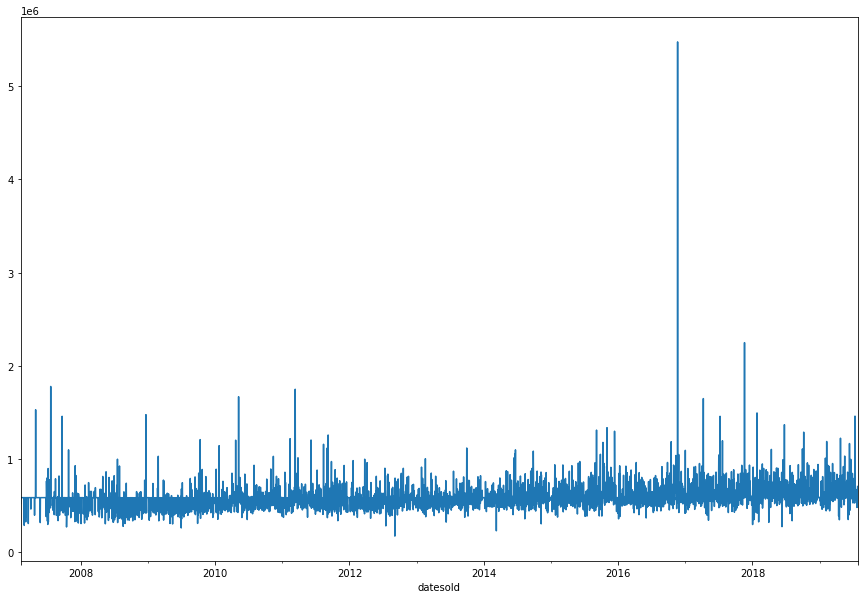

In [ ]:
df['price'].plot(figsize=(15,10))

# SEASONAL DECOMPOSITION

In [ ]:
df.index.freq='D'

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['price'],model='mul')

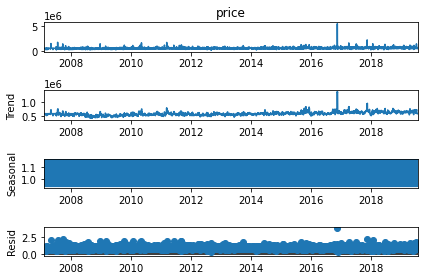

In [ ]:
result.plot();

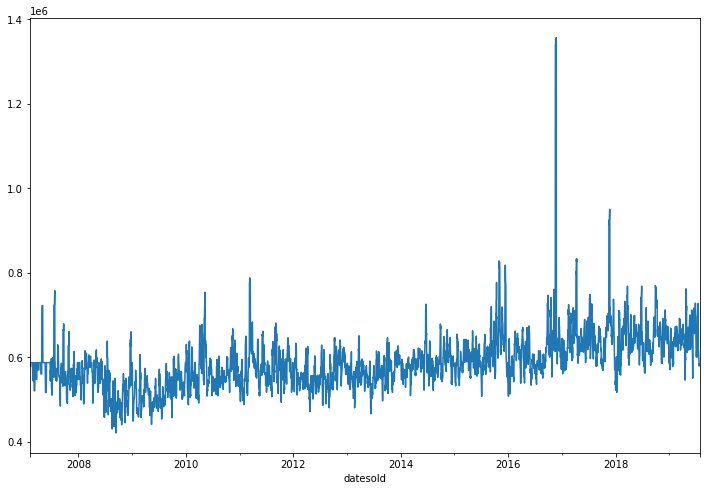

In [ ]:
result.trend.plot(figsize=(12,8))

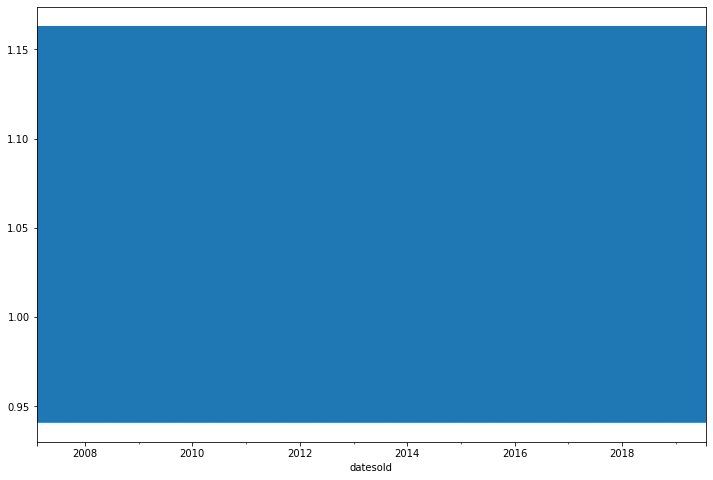

In [ ]:
result.seasonal.plot(figsize=(12,8))

# VERY LOW SEASONALITY AND NOT ANY GENERAL TREND

# AUGMENTED DICKEY FULLER TEST FOR STATIONARITY

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df['price'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -5.926036e+00
p-value                 2.442489e-07
# lags used             2.700000e+01
# observations          4.526000e+03
critical value (1%)    -3.431796e+00
critical value (5%)    -2.862179e+00
critical value (10%)   -2.567110e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### STATIONARY DATA ALSO CONFIRMS LOW SEASONALITY

# MAKING SARIMAX MODEL

In [ ]:
df

,price,propertyType,bedrooms
datesold,,,
2007-02-07,525000.000000,0.000000,4.000000
2007-02-08,587596.701512,0.157264,3.259281
2007-02-09,587596.701512,0.157264,3.259281
2007-02-10,587596.701512,0.157264,3.259281
2007-02-11,587596.701512,0.157264,3.259281
...,...,...,...
2019-07-23,562123.333333,0.400000,3.066667
2019-07-24,482500.000000,0.500000,2.250000
2019-07-25,547800.000000,0.466667,2.466667


## GETTING BEST SET OF p,q,d and P,Q,D values

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

# USING NO OF BEDROOMS AS ONLY EXOGENOUS VARIABLE

In [ ]:
auto_arima(df['price'],exogenous=df[['bedrooms']],start_p=0,start_q=0,seasonal=False,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=122731.171, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=121520.986, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=119856.966, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=156529.556, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=119856.861, Time=1.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=119858.496, Time=2.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=119772.740, Time=2.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=119788.968, Time=1.58 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=119772.793, Time=2.64 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=119763.507, Time=2.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=119764.141, Time=2.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=119764.710, Time=2.24 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=119763.565, Time=3.28 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=119761.531, Time=2.94 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4554
Model:               SARIMAX(0, 1, 5)   Log Likelihood              -59869.175
Date:                Tue, 03 Aug 2021   AIC                         119752.349
Time:                        12:04:05   BIC                         119797.314
Sample:                    02-07-2007   HQIC                        119768.184
                         - 07-27-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    1.577e+05   2683.196     58.787      0.000    1.52e+05    1.63e+05
ma.L1         -0.9660      0.013    -76.829      0.000      -0.991      -0.941
ma.L2         -0.0282      0.024     -1.183      0.237      -0.075       0.019
ma.L3         -0.0045      0.035     -0.130      0.896      -0.073       0.064
ma.L4         -0.0225      0.039     -0.580      0.562      -0.098       0.053
ma.L5          0.0354      0.026      1.368      0.171      -0.015       0.086
sigma2      1.649e+10      0.107   1.54e+11      0.000    1.65e+10    1.65e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          31588867.73
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                            12.57
Prob(H) (two-sided):                  0.00   Kurtosis:                       410.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.35e+25. Standard errors may be unstable.
"""

## SPLITTING DATA

In [ ]:
train = df.iloc[0:-14]
test = df.iloc[-14:]

In [ ]:
train

,price,propertyType,bedrooms
datesold,,,
2007-02-07,5.250000e+05,0.000000,4.000000
2007-02-08,5.875967e+05,0.157264,3.259281
2007-02-09,5.875967e+05,0.157264,3.259281
2007-02-10,5.875967e+05,0.157264,3.259281
2007-02-11,5.875967e+05,0.157264,3.259281
...,...,...,...
2019-07-09,5.780000e+05,0.200000,2.900000
2019-07-10,5.888636e+05,0.454545,2.909091
2019-07-11,5.296000e+05,0.400000,2.800000


In [ ]:
test

,price,propertyType,bedrooms
datesold,,,
2019-07-14,587596.701512,0.157264,3.259281
2019-07-15,665200.000000,0.200000,3.200000
2019-07-16,601077.777778,0.111111,2.888889
2019-07-17,565533.333333,0.266667,2.933333
2019-07-18,581500.000000,0.444444,2.777778
2019-07-19,630100.000000,0.100000,3.500000
2019-07-20,674428.571429,0.000000,3.428571
2019-07-21,587596.701512,0.157264,3.259281
2019-07-22,607571.428571,0.000000,3.142857


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train['price'],exog=train[['bedrooms']],order=(0,1,5),seasonal=False,seasonal_order=(0,0,0,0),enforce_invertibility=False)

In [ ]:
fitted_model = model.fit()

In [ ]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 4540
Model:               SARIMAX(0, 1, 5)   Log Likelihood              -59690.414
Date:                Tue, 03 Aug 2021   AIC                         119394.829
Time:                        12:04:09   BIC                         119439.772
Sample:                    02-07-2007   HQIC                        119410.658
                         - 07-13-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    1.581e+05   2684.299     58.894      0.000    1.53e+05    1.63e+05
ma.L1         -0.9650      0.012    -77.417      0.000      -0.989      -0.941
ma.L2         -0.0297      0.024     -1.239      0.216      -0.077       0.017
ma.L3         -0.0044      0.035     -0.126      0.900      -0.073       0.064
ma.L4         -0.0221      0.039     -0.568      0.570      -0.098       0.054
ma.L5          0.0353      0.026      1.355      0.175      -0.016       0.086
sigma2      1.652e+10      0.107   1.54e+11      0.000    1.65e+10    1.65e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          31325202.68
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                            12.56
Prob(H) (two-sided):                  0.00   Kurtosis:                       409.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.09e+24. Standard errors may be unstable.
"""

In [ ]:
predictions=fitted_model.predict(len(train),len(train)+len(test)-1,exog=test[['bedrooms']]).rename('SARIMAX')

In [ ]:
predictions

2019-07-14    687967.283522
2019-07-15    654652.548633
2019-07-16    601370.397555
2019-07-17    586981.875973
2019-07-18    592245.587191
2019-07-19    706421.416259
2019-07-20    695129.301296
2019-07-21    668366.253710
2019-07-22    649960.841445
2019-07-23    637915.918818
2019-07-24    508809.404411
2019-07-25    543062.153131
2019-07-26    574680.075027
2019-07-27    838162.757491
Freq: D, Name: SARIMAX, dtype: float64

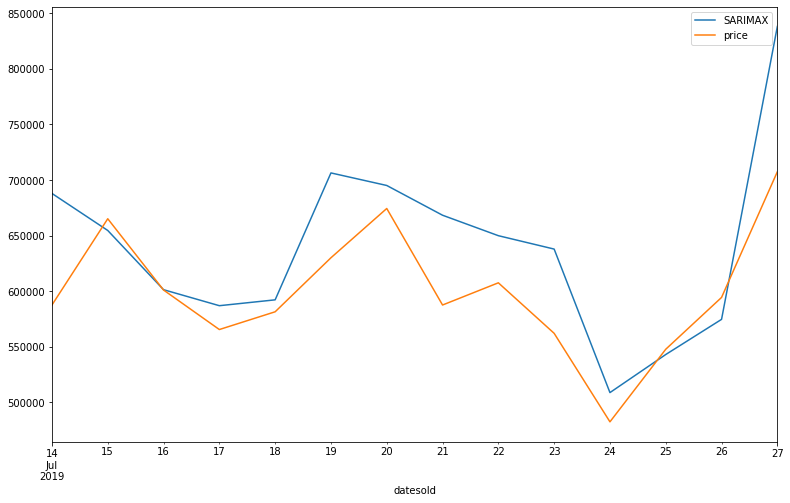

In [ ]:
predictions.plot(figsize=(13,8),legend=True)
test['price'].plot(legend=True);

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(predictions,test['price'],squared=False)

In [ ]:
rmse

59315.29900019868

In [ ]:
df['price'].mean()

587596.7015118237

# RMSE 59315 (ABOUT 10% OF MEAN PRICE)